In [124]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [125]:
def plotting(X,y,clf=None,resolution=0.2,ax=None):
    marker=['s','o']
    color=['red','blue']
    cmap=ListedColormap(color[:len(np.unique(y))])

    x1_min,x1_max=X[:,0].min() ,X[:,0].max() 
    x2_min,x2_max=X[:,1].min(), X[:,1].max() 


    x1,x2=np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution)

    xx1,xx2=np.meshgrid(x1,x2)

    Z=clf.predict(np.column_stack([xx1.flatten(),xx2.flatten()]))
    Z=Z.reshape(xx1.shape)

    ax.contourf(xx1,xx2,Z,cmap=cmap,alpha=0.2)

    ax.set_xticks(x1)
    ax.set_yticks(x2)

    for idx,c in enumerate(np.unique(y)):
        ax.scatter(X[y==c,0],
                   X[y==c,1],
                   marker=marker[idx],
                   color=color[idx])

In [126]:
import numpy as np
from sklearn.datasets import load_iris as d
from sklearn.model_selection import train_test_split as tts 
import warnings 
warnings.filterwarnings("ignore")


In [127]:
class LogisticRegressionSGD:
    def __init__(self,eta=0.1,n_iters=100):
        self.eta=eta 
        self.n_iters=n_iters 


    def fit(self,X,y):
        n_samples,n_features=X.shape 

        rgen=np.random.RandomState(seed=1)
        self.w_=rgen.normal(loc=0.0,scale=0.1,
                                 size=n_features)
        self.b_=rgen.normal(loc=0.0,scale=0.1,
                            size=1)
        

        for _ in range(self.n_iters):
                for idx,x in enumerate(X):
                    x=np.array([x])
                    y_pred=self.activation(self.net_input(x))

                    error=(y_pred-y[idx]) 

                    self.update(error,x)



        return self
    

    def net_input(self,x):
        return np.dot(x,self.w_)+self.b_ 
    

    def activation(self,z):
        return 1/(1+np.exp(-z))
    
    def update(self,error,x):
    
        self.w_+=(-self.eta*(x.T.dot(error)))
        self.b_+=(-self.eta*np.sum(error))
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>0.5,1,0)

In [128]:
X,y=d().data[:,:2],d().target
y=np.where(y>1,0,1)
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=1234)

In [129]:
model=LogisticRegressionSGD(n_iters=100,eta=0.1)
model.fit(X_train,y_train)

In [130]:
y_pred=model.predict(X_test)



In [131]:
X_test.shape

(30, 2)

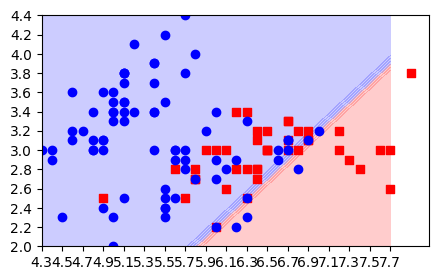

In [132]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,3))
plotting(X=X_train,y=y_train,clf=model,ax=ax)


In [133]:
def acc(y,y_pred):
    return np.sum(y==y_pred)/len(y)

In [134]:
acc(y_test,y_pred)

0.8666666666666667